# Please submit this assignment before next monday 17-5-2021 at 11:59 PM on :

# ccnewtrend2021@gmail.com
--------------------------------------------------------

# Logistic Regression Project 

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [3]:
ad_data = pd.read_csv('advertising.csv')

**Check the head of ad_data**

In [4]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


** Use info and describe() on ad_data**

In [5]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [6]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

<AxesSubplot:>

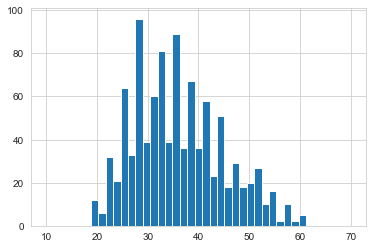

In [7]:
sns.set_style('whitegrid')
ad_data['Age'].hist(bins=41,range=[10,70])

# Standardize the Variables

Time to standardize the variables.

** Import StandardScaler from Scikit learn.**

In [8]:
from sklearn.preprocessing  import StandardScaler


<AxesSubplot:>

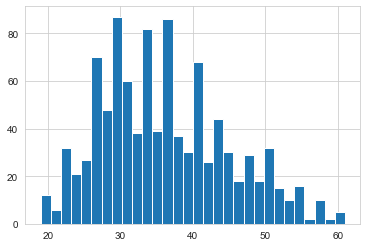

In [9]:
ad_data['Age'].hist(bins=30)

**First: you need to drop object variables, as the scaller can be applied only on int and float variables**
** Create a StandardScaler() object called scaler.**

In [10]:
myscaler = StandardScaler()
ad_data.drop(['Ad Topic Line','City','Country','Timestamp'],axis=1,inplace=True)
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


** Fit scaler to the features.**

In [11]:
myscaler.fit(ad_data.drop('Clicked on Ad', axis = 1))

StandardScaler()

**Use the .transform() method to transform the features to a scaled version.**

In [12]:
X = myscaler.transform(ad_data.drop('Clicked on Ad', axis = 1))

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [13]:
tdf = pd.DataFrame(X, columns=ad_data.columns[:-1])
tdf.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,0.249267,-0.114905,0.509691,1.734030,-0.962695
1,0.961132,-0.570425,1.002530,0.313805,1.038750
2,0.282083,-1.139826,0.356949,1.287589,-0.962695
3,0.577432,-0.798185,-0.014456,1.501580,1.038750
4,0.212664,-0.114905,1.408868,1.038731,-0.962695


# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**

In [14]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(ad_data.drop('Clicked on Ad',axis=1),ad_data['Clicked on Ad'],test_size=0.30,random_state=101)

** Train and fit a logistic regression model on the training set.**

In [16]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)

LogisticRegression()

## Predictions and Evaluations
** Now predict values for the testing data.**

In [17]:
predictions = logmodel.predict(X_test)

** Create a classification report for the model.**

In [18]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



# Using KNN

**Import KNeighborsClassifier from scikit learn.**

In [19]:
from sklearn.neighbors import KNeighborsClassifier

**Create a KNN model instance with n_neighbors=1**

In [20]:
knn = KNeighborsClassifier(n_neighbors=1)

**Fit this KNN model to the training data.**

In [21]:
knn.fit(X_test,Y_test)

KNeighborsClassifier(n_neighbors=1)

# Predictions and Evaluations
Let's evaluate our KNN model!

**Use the predict method to predict values using your KNN model and X_test.**

In [22]:
from sklearn.metrics import classification_report,confusion_matrix
pre = knn.predict(X_test)

** Create a confusion matrix and classification report.**

In [23]:
print(confusion_matrix(Y_test,pre))

[[157   0]
 [  0 143]]


In [24]:
print(classification_report(Y_test,pre))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       143

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

** Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

In [25]:
err_rates = []
for idx in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = idx)
    knn.fit(X_train, Y_train)
    pred_idx = knn.predict(X_test)
    err_rates.append(np.mean(pred_idx != Y_test))

**Now create the following plot using the information from your for loop.**

Text(0.5, 1.0, 'Error Rate vs K-value')

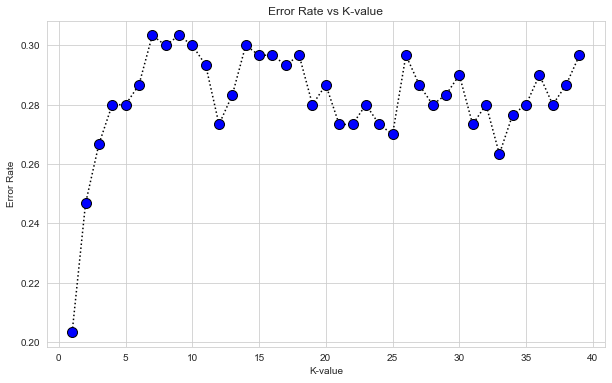

In [32]:

plt.figure(figsize = (10,6))
plt.plot(range(1,40), err_rates, linestyle = 'dotted', color = 'black', marker = 'o', markerfacecolor = 'blue',markersize=10)
plt.xlabel('K-value')
plt.ylabel('Error Rate')
plt.title('Error Rate vs K-value')

## Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

In [27]:
myKNN = KNeighborsClassifier(n_neighbors = 2)
myKNN.fit(X_train,Y_train)
y_predict = myKNN.predict(X_test)

print('WITH K=2')
print('')
print(confusion_matrix(Y_test,y_predict))
print('')
print(classification_report(Y_test,y_predict))

WITH K=2

[[140  17]
 [ 57  86]]

              precision    recall  f1-score   support

           0       0.71      0.89      0.79       157
           1       0.83      0.60      0.70       143

    accuracy                           0.75       300
   macro avg       0.77      0.75      0.75       300
weighted avg       0.77      0.75      0.75       300



## Great Job!